<a href="https://colab.research.google.com/github/Arnab6911/diabetes-prediction-ml/blob/main/Arnab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Dataset Overview ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768

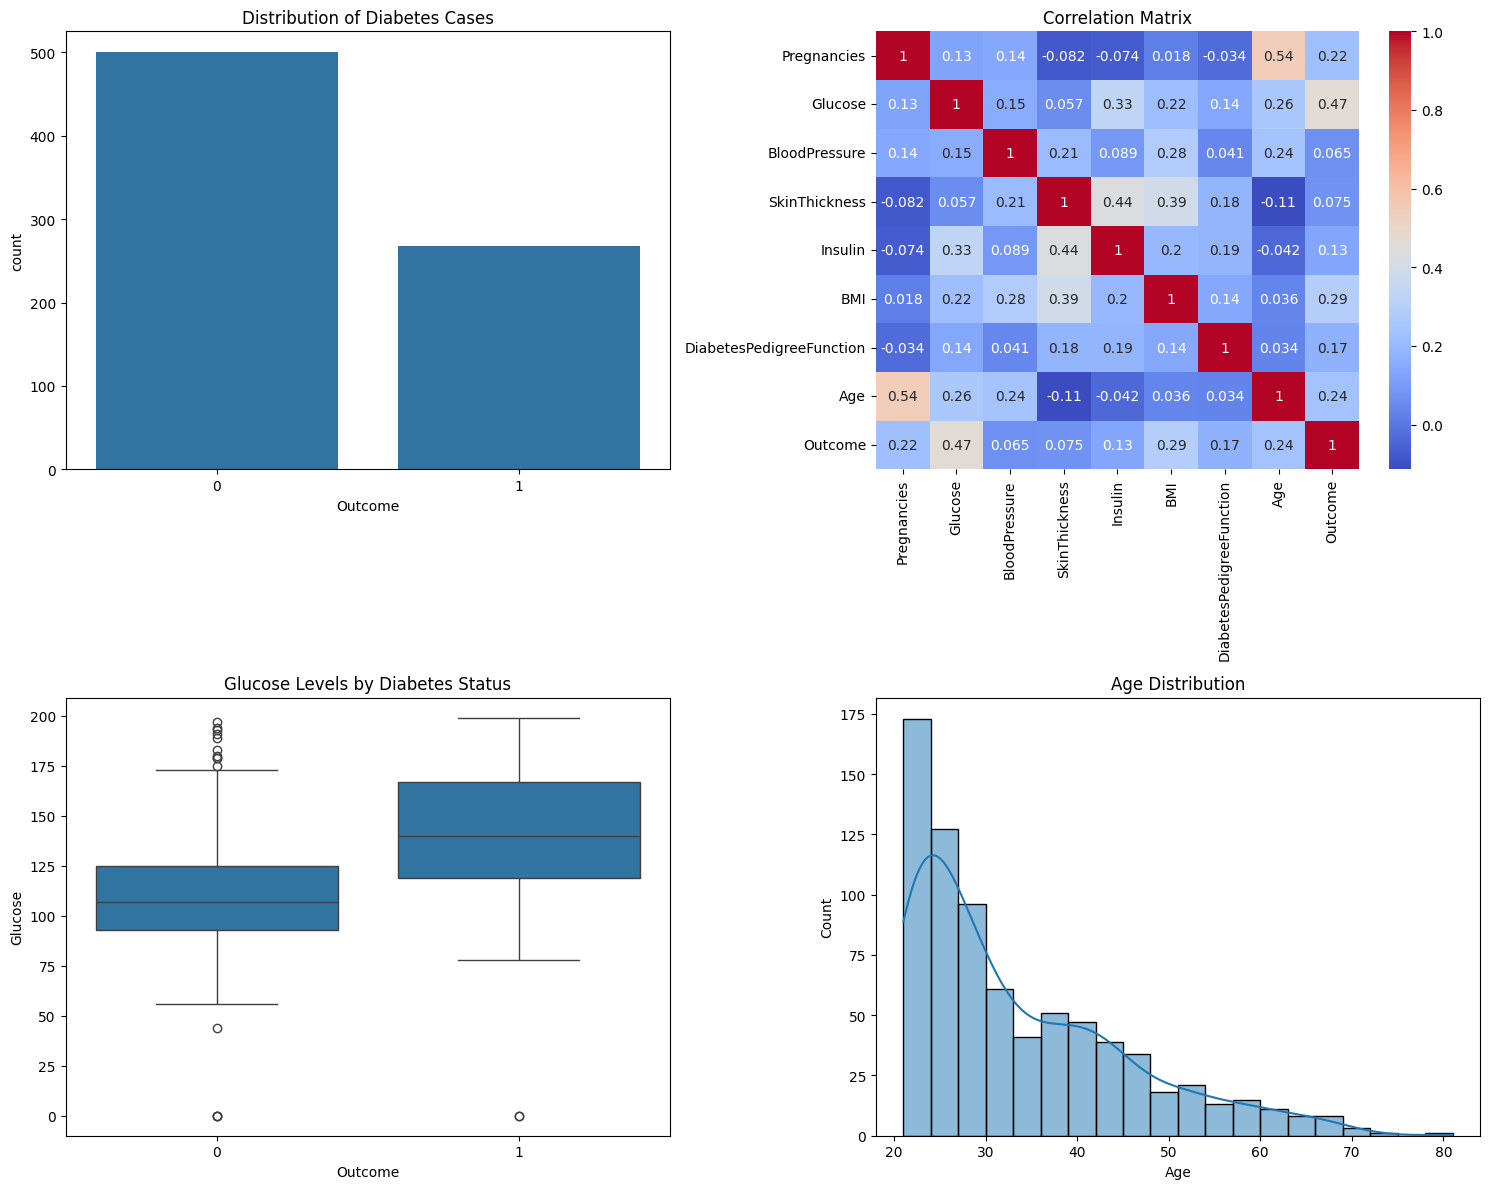


=== KNN Model ===
Accuracy: 0.70

Confusion Matrix:
[[119  32]
 [ 37  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



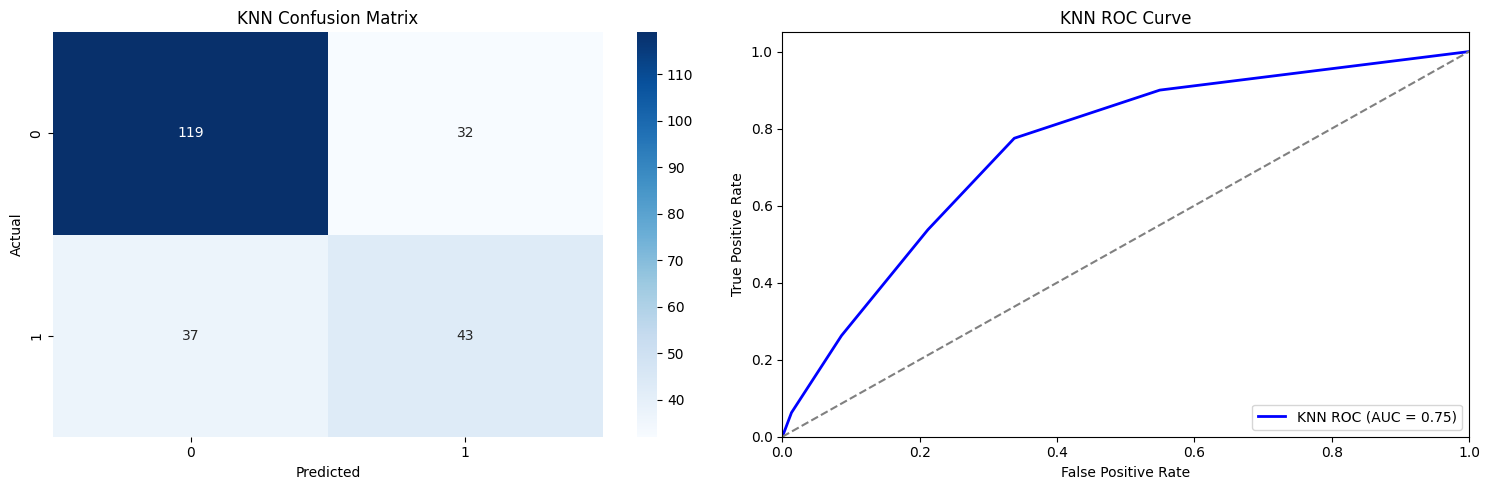


=== Decision Tree Model ===
Accuracy: 0.72

Confusion Matrix:
[[141  10]
 [ 55  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



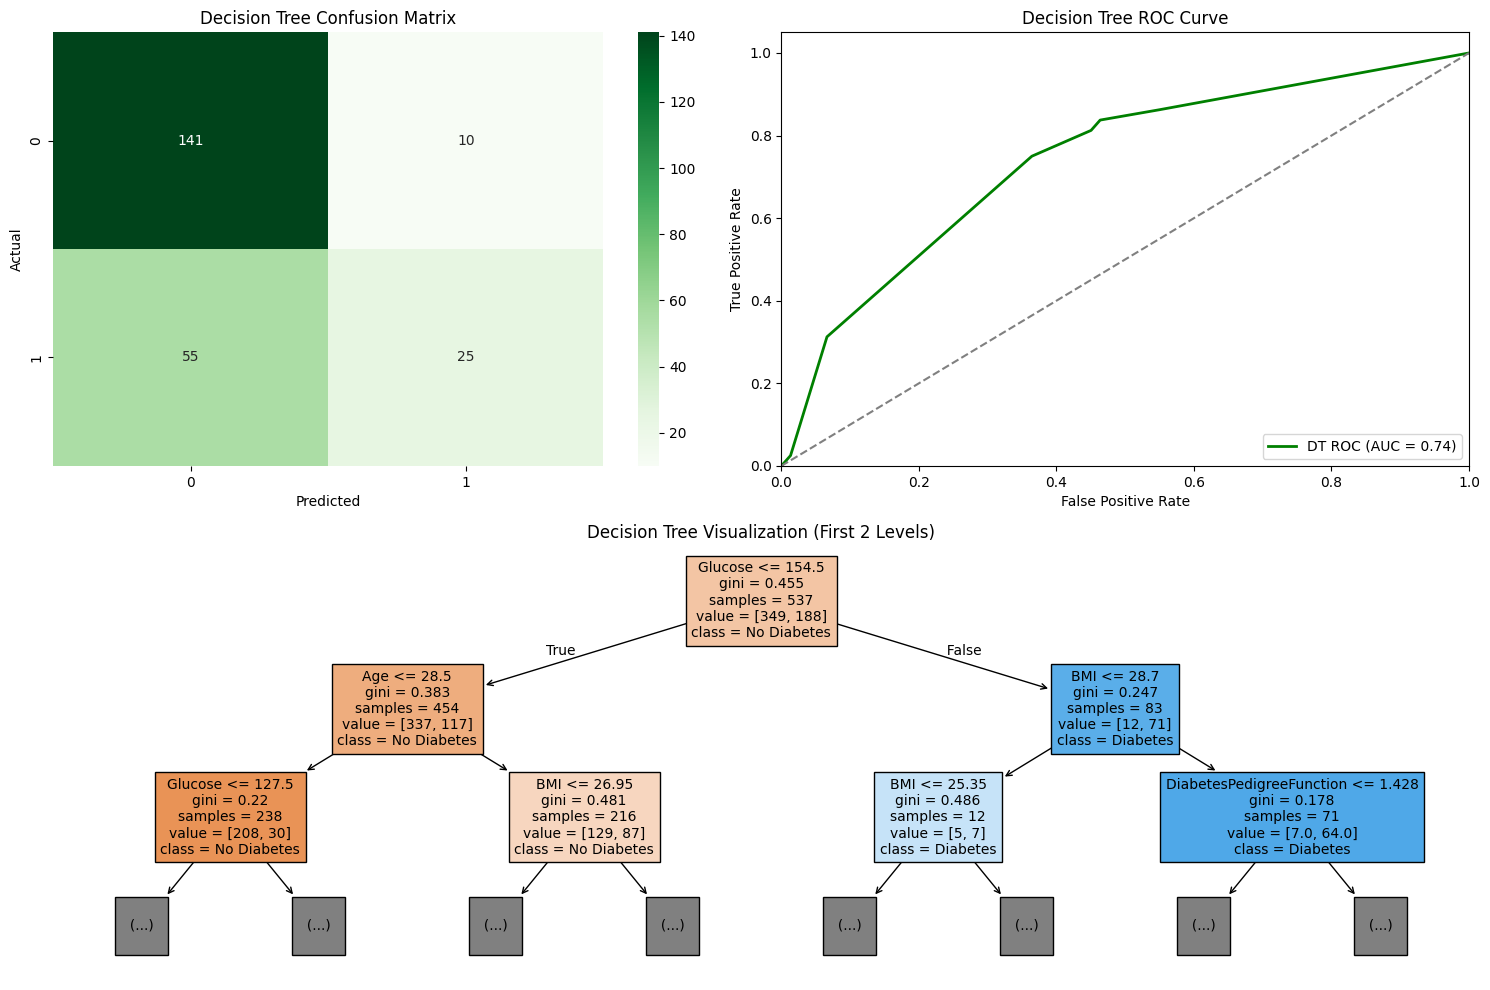

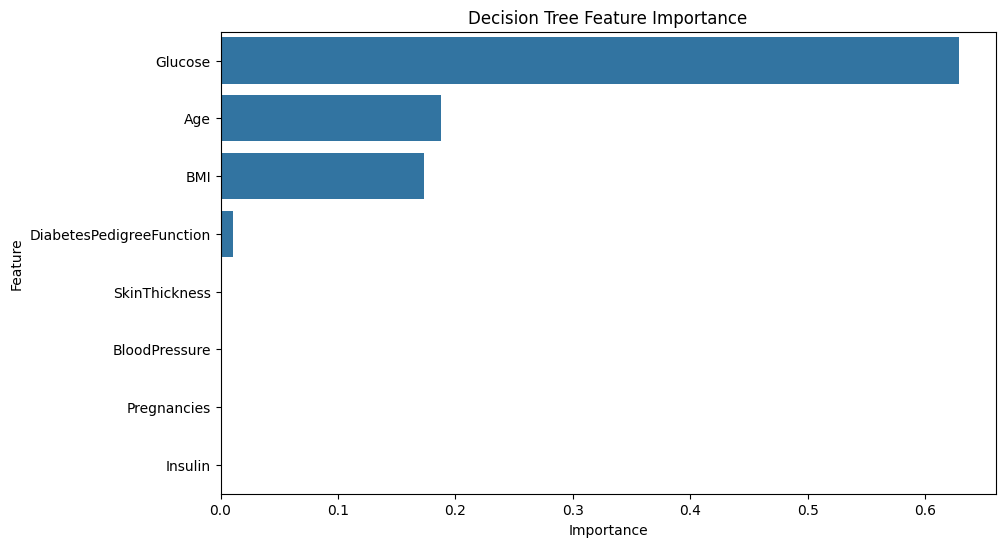

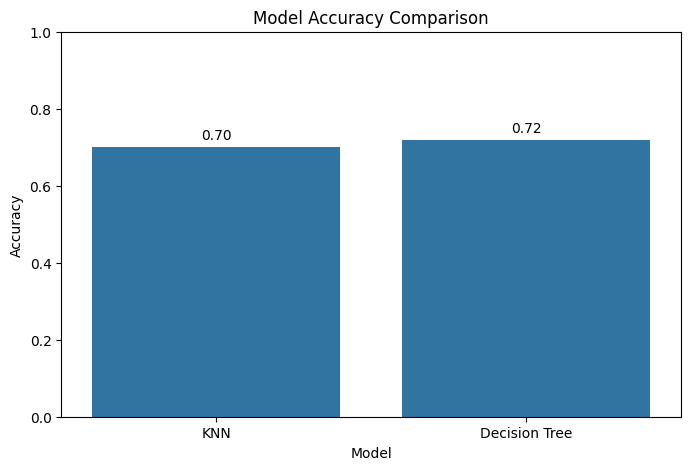

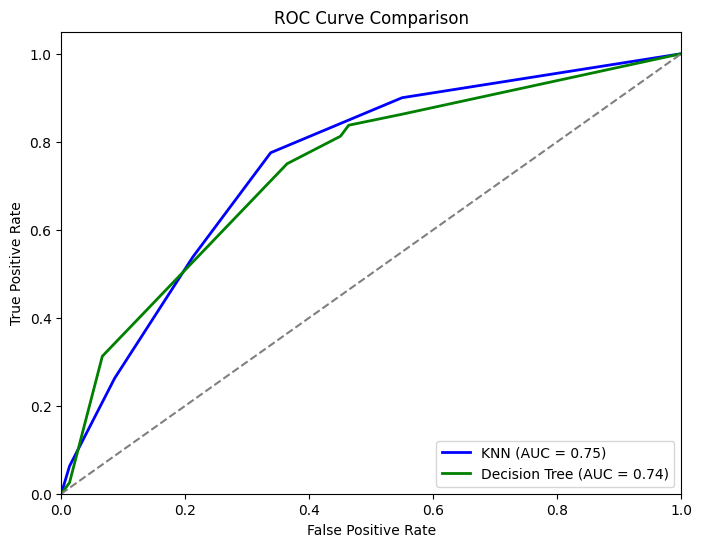


=== Project Completed ===


In [ ]:
# Diabetes Prediction Project - KNN and Decision Tree
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, roc_curve, auc)
from sklearn.tree import plot_tree

# Load the dataset
# For Colab: Upload diabetes.csv first
# For Kaggle: Use '../input/pima-indians-diabetes-database/diabetes.csv'
df = pd.read_csv('diabetes.csv')  # Adjust path as needed

# 1. Exploratory Data Analysis (EDA)
print("\n=== Dataset Overview ===")
print(df.head())
print("\n=== Dataset Information ===")
print(df.info())
print("\n=== Statistical Summary ===")
print(df.describe())
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(15, 12))

# Distribution of Outcome
plt.subplot(2, 2, 1)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Cases')

# Correlation Matrix
plt.subplot(2, 2, 2)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Glucose vs Outcome
plt.subplot(2, 2, 3)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Status')

# Age Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

# 2. Data Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. KNN Model
print("\n=== KNN Model ===")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print("\nConfusion Matrix:")
print(cm_knn)
print("\nClassification Report:")
print(cr_knn)

# KNN Visualizations
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC Curve
plt.subplot(1, 2, 2)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2,
         label=f'KNN ROC (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 4. Decision Tree Model
print("\n=== Decision Tree Model ===")
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cr_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.2f}")
print("\nConfusion Matrix:")
print(cm_dt)
print("\nClassification Report:")
print(cr_dt)

# Decision Tree Visualizations
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC Curve
plt.subplot(2, 2, 2)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2,
         label=f'DT ROC (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")

# Decision Tree Visualization
plt.subplot(2, 2, (3, 4))
plot_tree(dt, filled=True, feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          max_depth=2, fontsize=10)
plt.title('Decision Tree Visualization (First 2 Levels)')

plt.tight_layout()
plt.show()

# 5. Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = dt.feature_importances_
features = X.columns
fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Decision Tree Feature Importance')
plt.show()

# 6. Model Comparison
models = ['KNN', 'Decision Tree']
accuracies = [accuracy_knn, accuracy_dt]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# Combined ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2,
         label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2,
         label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

print("\n=== Project Completed ===")